# Figures 4.5 and 4.6: Convergence of Padé with H=0.2
$$
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\F}{\mathcal{F} }
\newcommand{\cF}{\mathcal{F} }
\newcommand{\E}{\mathbb{E} }
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\p}{\partial}
\newcommand{\PP}{\mathbb{P} }
\newcommand{\CC}{\mathbb{C} }
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\R}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\Hess}{\mathrm{Hess} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bit}{\begin{itemize}}
\newcommand{\eit}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\tr}{\mbox{tr}}
$$

In [1]:
source("roughHestonAdamsLambda.R")
source("roughHestonPadeLambda.R")

In [2]:
library(colorspace)
library(repr)
options(repr.plot.width=10,repr.plot.height=7)
my.col <- sequential_hcl(7, palette="Batlow")

We choose parameters similar to those in Roughening Heston.

Set $H=0.2$:

In [3]:
H <- .200001

In [4]:
params.rHeston <- list(H=H,al=.5+H,nu=.4,rho=-.65,lam=1)

### Giacomo Bormetti Adams scheme

In [5]:
a <- 3-1i/2
n <- 1000
xx <- 8
x.adams.1k <- xx*(0:n)/n

In [6]:
dh.adams.1k <- dhA(params.rHeston)(n=n,a=a,bigT=xx)

### Padé approximation

In [7]:
d.h.Pade33(params.rHeston)(a,3)

[1] -0.5154257+0.3000039i

In [8]:
h.Pade33(params.rHeston)(a,3)

[1] -2.520564+1.086576i

### Graphical comparison of approximations

$ m n$ means order $m$ polynomial in the numerator and order $n$ polynomial in the denominator.

- `d.h.pade22` and `d.h.pade33` are $D^\alpha H(a,x)$ using Padé approximations of $h(a,x)$ 

### Figure 4.1: Plot $\Re$ and $\Im$ together


In [9]:
options(repr.plot.width=14,repr.plot.height=7, repr.plot.res=200)

In [10]:
legend.text <- c(
    expression(h[A]),
    expression(h^{(list(2,2))}),
    expression(h^{(list(3,3))}),
    expression(h^{(list(4,4))}),
    expression(h^{(list(5,5))}),
    expression(h^{(list(6,6))}))

In [11]:
legend.ty <- rep(1,6)
legend.col <- c("hotpink2",my.col[2:6])
legend.lw <- c(3,1,1,1,1,1)

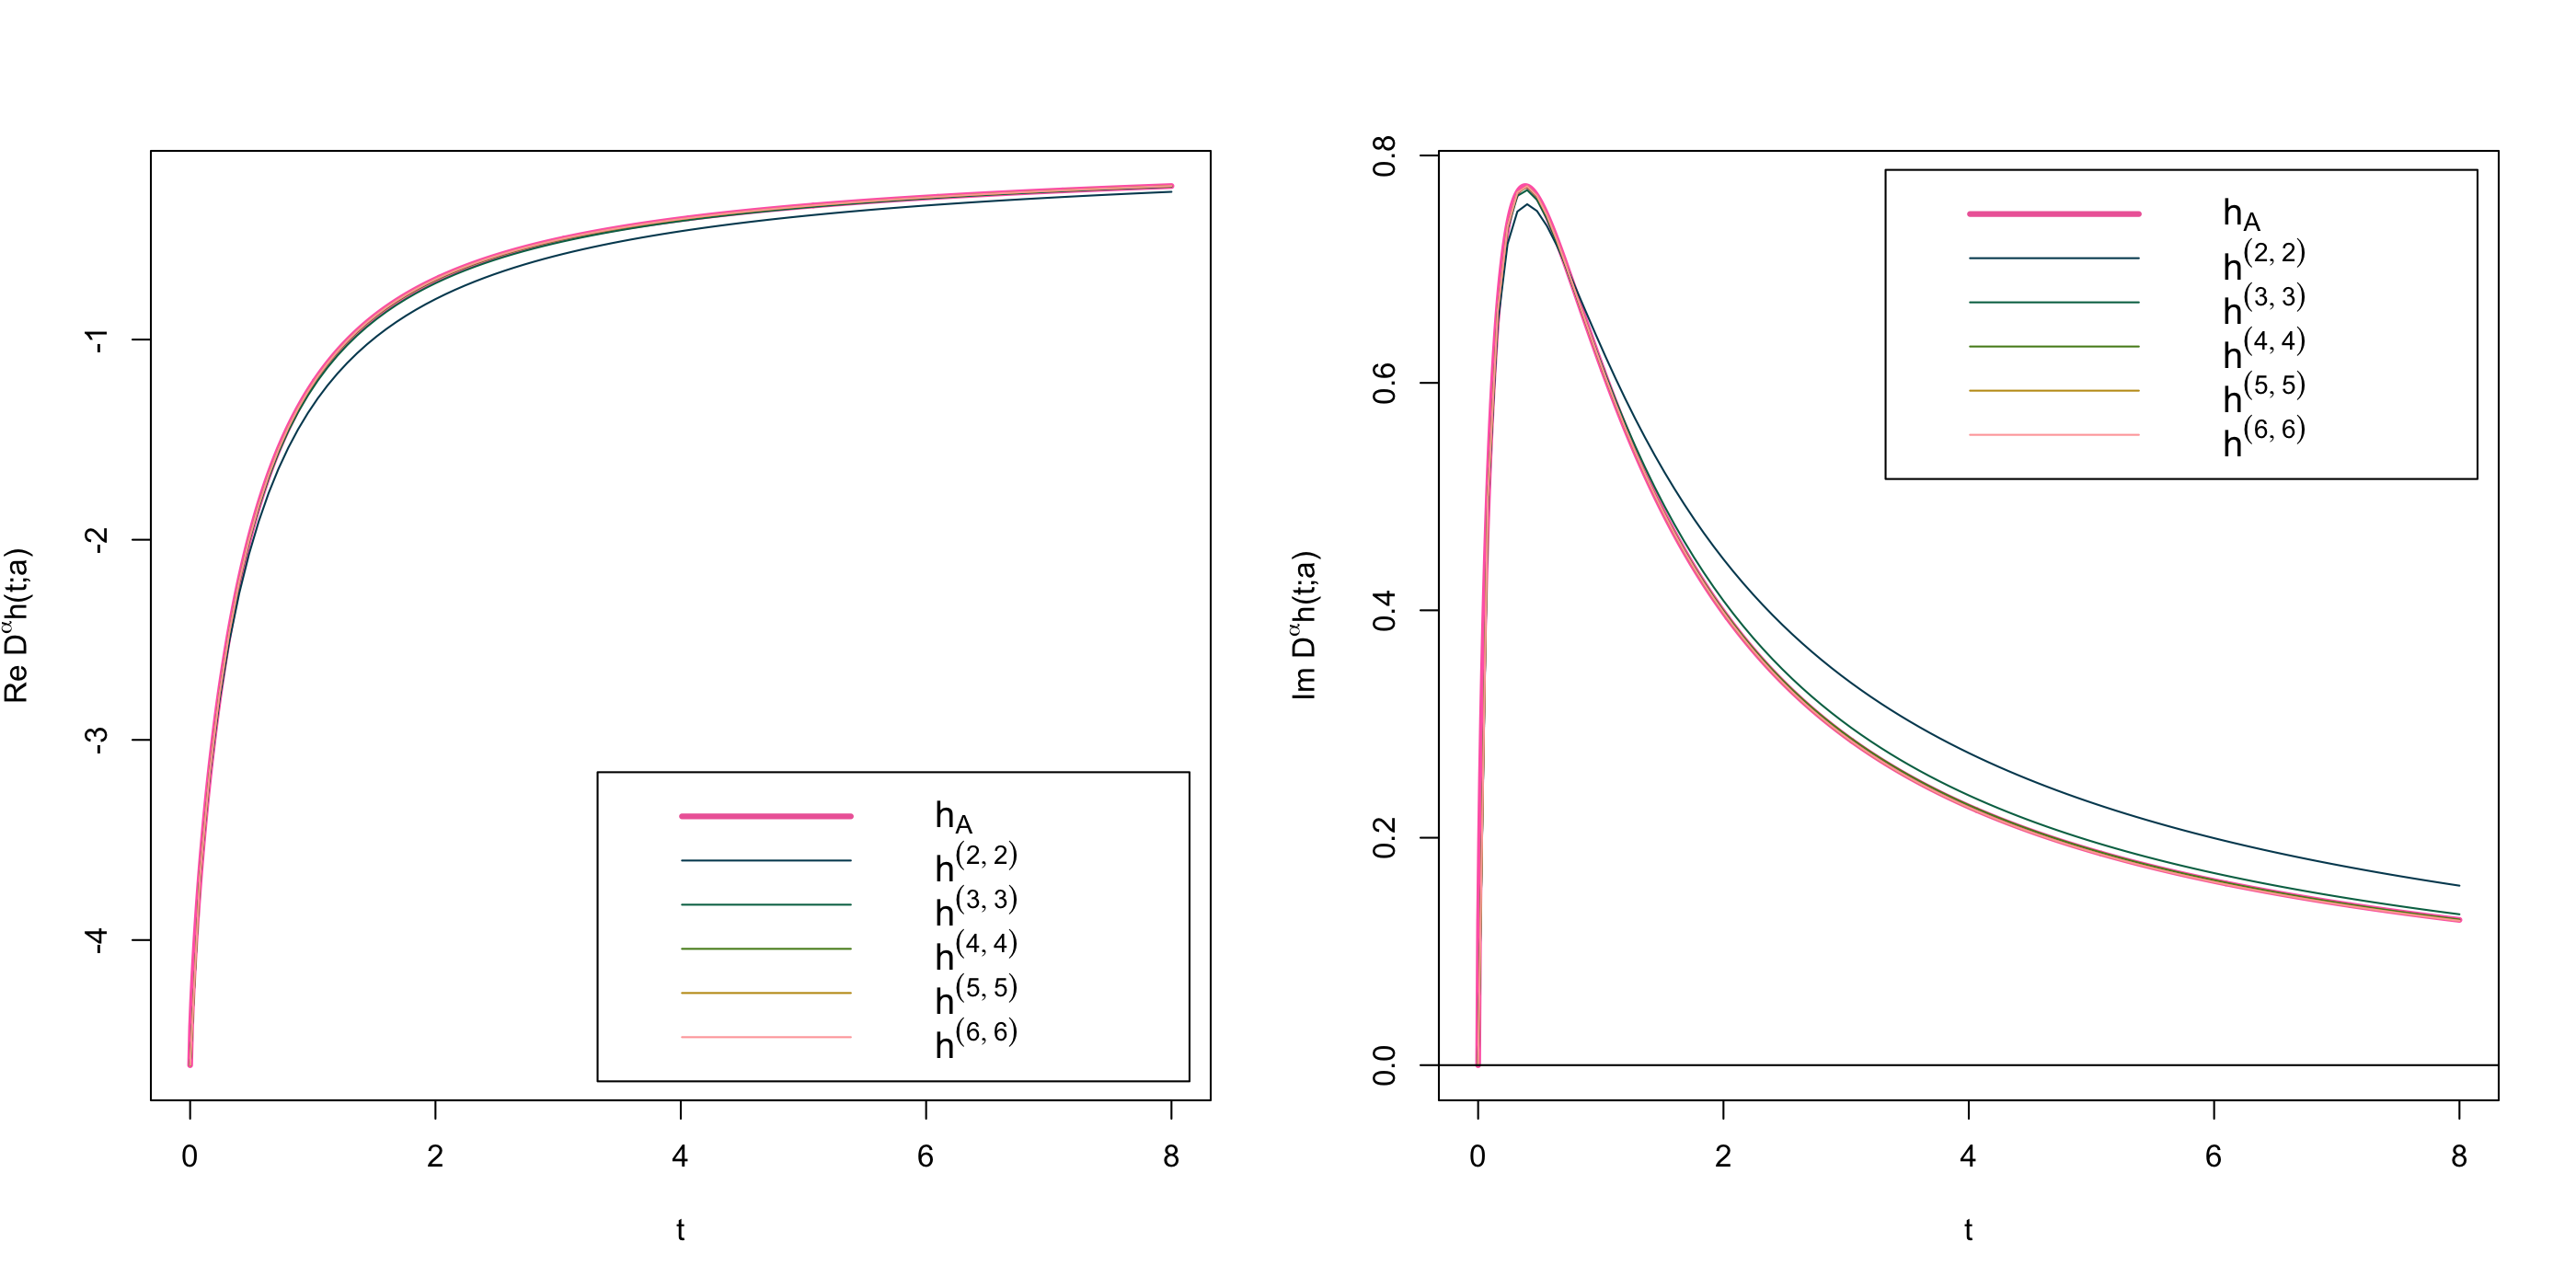

In [12]:
par(mfrow=c(1,2))

plot(x.adams.1k,Re(dh.adams.1k),type="l",col="hotpink",lty=1,lwd=3,
     ylab=expression(paste("Re ",D^alpha,"h(t;a)",sep="")),xlab="t")
curve(Re(d.h.Pade22(params.rHeston)(a,x)),from=0,to=xx,col=my.col[2],lty=1,lwd=1,add=T)
curve(Re(d.h.Pade33(params.rHeston)(a,x)),from=0,to=xx,col=my.col[3],lty=1,lwd=1,add=T)
curve(Re(d.h.Pade44(params.rHeston)(a,x)),from=0,to=xx,col=my.col[4],lty=1,lwd=1,add=T)
curve(Re(d.h.Pade55(params.rHeston)(a,x)),from=0,to=xx,col=my.col[5],lty=1,lwd=1,add=T)
curve(Re(d.h.Pade66(params.rHeston)(a,x)),from=0,to=xx,col=my.col[6],lty=1,lwd=1,add=T)
legend("bottomright", legend = legend.text,  cex = 1.2, 
       col=legend.col, lwd = legend.lw, lty=legend.ty,inset=0.02)

plot(x.adams.1k,Im(dh.adams.1k),type="l",col="hotpink",lty=1,lwd=3,
     ylab=expression(paste("Im ",D^alpha,"h(t;a)",sep="")),xlab="t")
curve(Im(d.h.Pade22(params.rHeston)(a,x)),from=0,to=xx,col=my.col[2],lty=1,lwd=1,add=T)
curve(Im(d.h.Pade33(params.rHeston)(a,x)),from=0,to=xx,col=my.col[3],lty=1,lwd=1,add=T)
curve(Im(d.h.Pade44(params.rHeston)(a,x)),from=0,to=xx,col=my.col[4],lty=1,lwd=1,add=T)
curve(Im(d.h.Pade55(params.rHeston)(a,x)),from=0,to=xx,col=my.col[5],lty=1,lwd=1,add=T)
curve(Im(d.h.Pade66(params.rHeston)(a,x)),from=0,to=xx,col=my.col[6],lty=1,lwd=1,add=T)
abline(h=0)
legend("topright", legend = legend.text,  cex = 1.2, 
       col=legend.col, lwd = legend.lw, lty=legend.ty,inset=0.02)


par(mfrow=c(1,1))

### Fig. 4.5 Plot Padé errors

In [13]:
dh.h22 <- d.h.Pade22(params.rHeston)(a,x.adams.1k)
dh.h33 <- d.h.Pade33(params.rHeston)(a,x.adams.1k)
dh.h44 <- d.h.Pade44(params.rHeston)(a,x.adams.1k)
dh.h55 <- d.h.Pade55(params.rHeston)(a,x.adams.1k)
dh.h66 <- d.h.Pade66(params.rHeston)(a,x.adams.1k)
dh.ref <- dh.adams.1k

In [14]:
legend.text <- c(
    expression(h^{(list(2,2))}),
    expression(h^{(list(3,3))}),
    expression(h^{(list(4,4))}),
    expression(h^{(list(5,5))}),
    expression(h^{(list(6,6))}))

In [15]:
legend.ty <- rep(1,5)
legend.col <- c(my.col[2:6])
legend.lw <- rep(2,5)

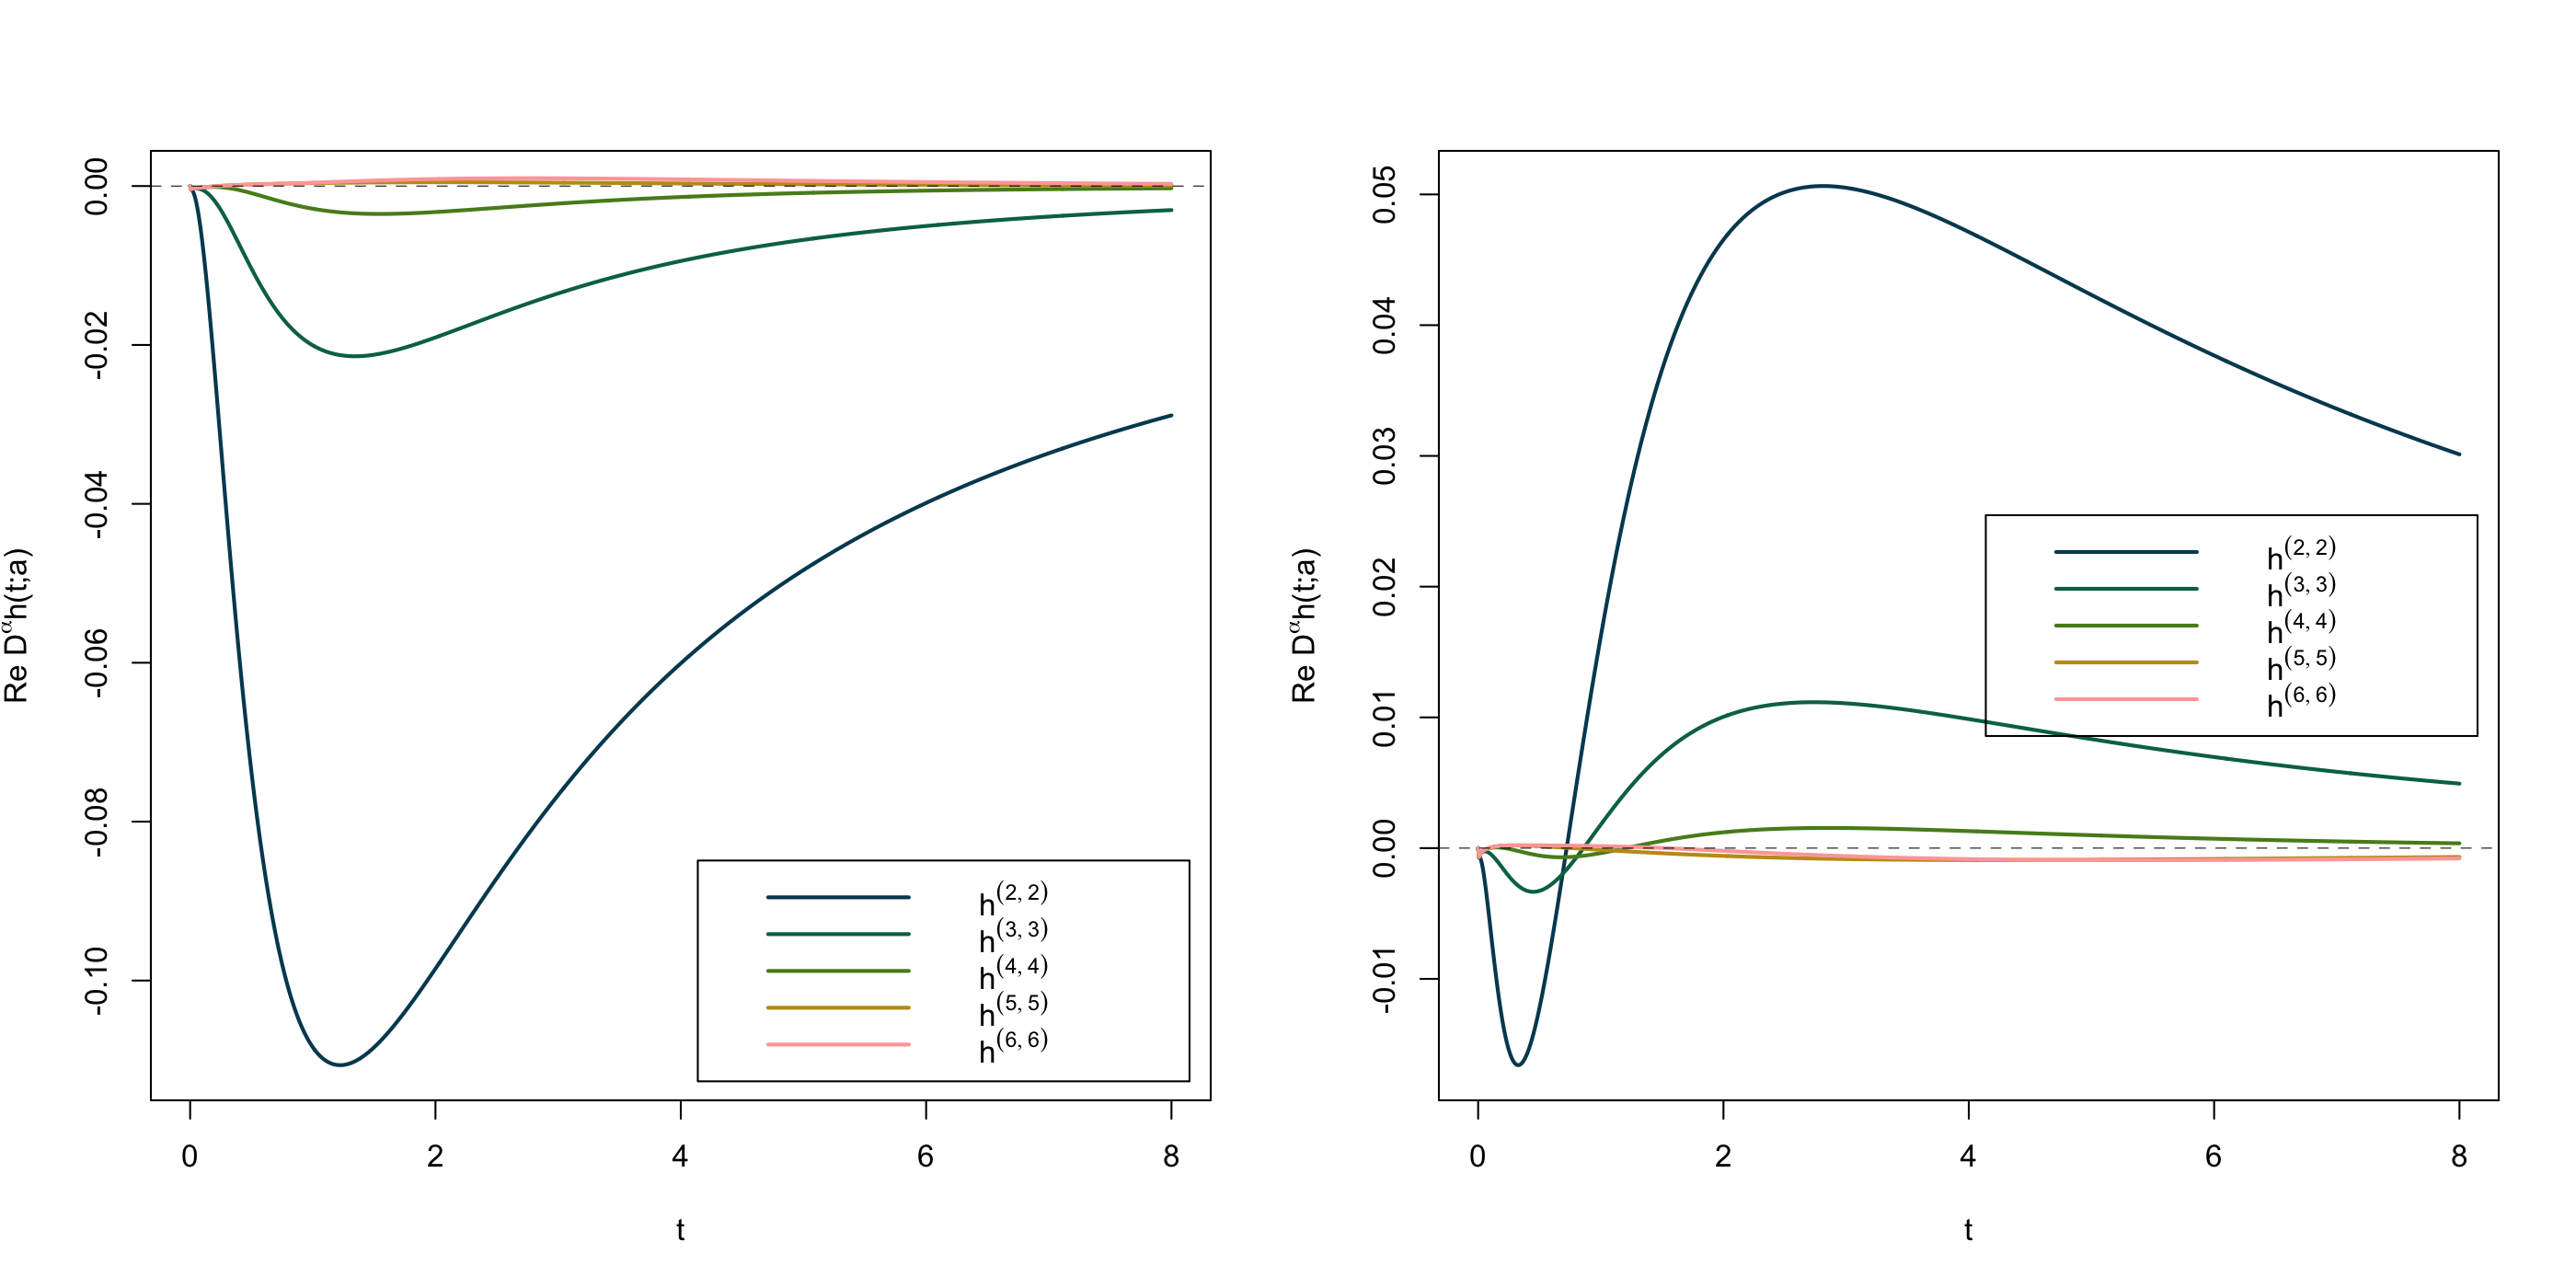

In [16]:
par(mfrow=c(1,2))

plot(x.adams.1k,Re(dh.h22)-Re(dh.ref),col=my.col[2],type="l",lwd=2,
     ylab=expression(paste("Re ",D^alpha,"h(t;a)",sep="")),xlab="t")
lines(x.adams.1k,Re(dh.h33)-Re(dh.ref),col=my.col[3],type="l",lwd=2)
lines(x.adams.1k,Re(dh.h44)-Re(dh.ref),col=my.col[4],type="l",lwd=2)
lines(x.adams.1k,Re(dh.h55)-Re(dh.ref),col=my.col[5],type="l",lwd=2)
lines(x.adams.1k,Re(dh.h66)-Re(dh.ref),col=my.col[6],type="l",lwd=2) 
abline(h=0,lwd=.5,lty=2)
legend("bottomright", legend = legend.text,  cex = 1, 
       col=legend.col, lwd = legend.lw, lty=legend.ty,inset=0.02)


plot(x.adams.1k,Im(dh.h22)-Im(dh.ref),col=my.col[2],type="l",lwd=2,
     ylab=expression(paste("Re ",D^alpha,"h(t;a)",sep="")),xlab="t")
lines(x.adams.1k,Im(dh.h33)-Im(dh.ref),col=my.col[3],type="l",lwd=2)
lines(x.adams.1k,Im(dh.h44)-Im(dh.ref),col=my.col[4],type="l",lwd=2)
lines(x.adams.1k,Im(dh.h55)-Im(dh.ref),col=my.col[5],type="l",lwd=2)
lines(x.adams.1k,Im(dh.h66)-Im(dh.ref),col=my.col[6],type="l",lwd=2)
abline(h=0,lwd=.5,lty=2)
legend("right", legend = legend.text,  cex = 1, 
       col=legend.col, lwd = legend.lw, lty=legend.ty,inset=0.02)

par(mfrow=c(1,1))

### Find and plot the biggest errors

#### Real part


In [17]:
f.Re <- function(dh.approx)function(x){Re(dh.approx(params.rHeston)(a,x))-Re(dhHeston(params.rHeston)(a,x))}

In [18]:
err.Re <- function(h.approx) {Re(h.approx)-Re(dh.ref)}

In [19]:
minpos <- function(h.approx) {which(err.Re(h.approx)==min(err.Re(h.approx)))}

In [20]:
maxpos <- function(h.approx) {which(err.Re(h.approx)==max(err.Re(h.approx)))}

In [21]:
c(minpos(dh.h22),maxpos(dh.h22))

[1] 154   1

In [22]:
err.Re(dh.h22)[154]

[1] -0.1106497

In [23]:
err.Re2 <- function(h.approx){max(-err.Re(h.approx)[minpos(h.approx)],err.Re(h.approx)[maxpos(h.approx)])}

In [24]:
err.Re2(dh.h22)

[1] 0.1106497

In [25]:
(err.Re.res <- c(
err.Re2(dh.h22),err.Re2(dh.h33),err.Re2(dh.h44),err.Re2(dh.h55),err.Re2(dh.h66)
    ))

[1] 0.1106496635 0.0214226955 0.0035125677 0.0004772788 0.0009795409

#### Imaginary part


In [26]:
err.Im <- function(h.approx) {Im(h.approx)-Im(dh.ref)}

In [27]:
minpos <- function(h.approx) {which(err.Im(h.approx)==min(err.Im(h.approx)))}

In [28]:
maxpos <- function(h.approx) {which(err.Im(h.approx)==max(err.Im(h.approx)))}

In [29]:
c(minpos(dh.h22),maxpos(dh.h22))

[1]  42 353

In [30]:
err.Im(dh.h22)[353]

[1] 0.05064097

In [31]:
err.Im2 <- function(h.approx){max(-err.Im(h.approx)[minpos(h.approx)],err.Im(h.approx)[maxpos(h.approx)])}

In [32]:
err.Im2(dh.h22)

[1] 0.05064097

In [33]:
(err.Im.res <- c(
err.Im2(dh.h22),err.Im2(dh.h33),err.Im2(dh.h44),err.Im2(dh.h55),err.Im2(dh.h66)
    ))

[1] 0.0506409714 0.0111600089 0.0015407245 0.0009104491 0.0009191880

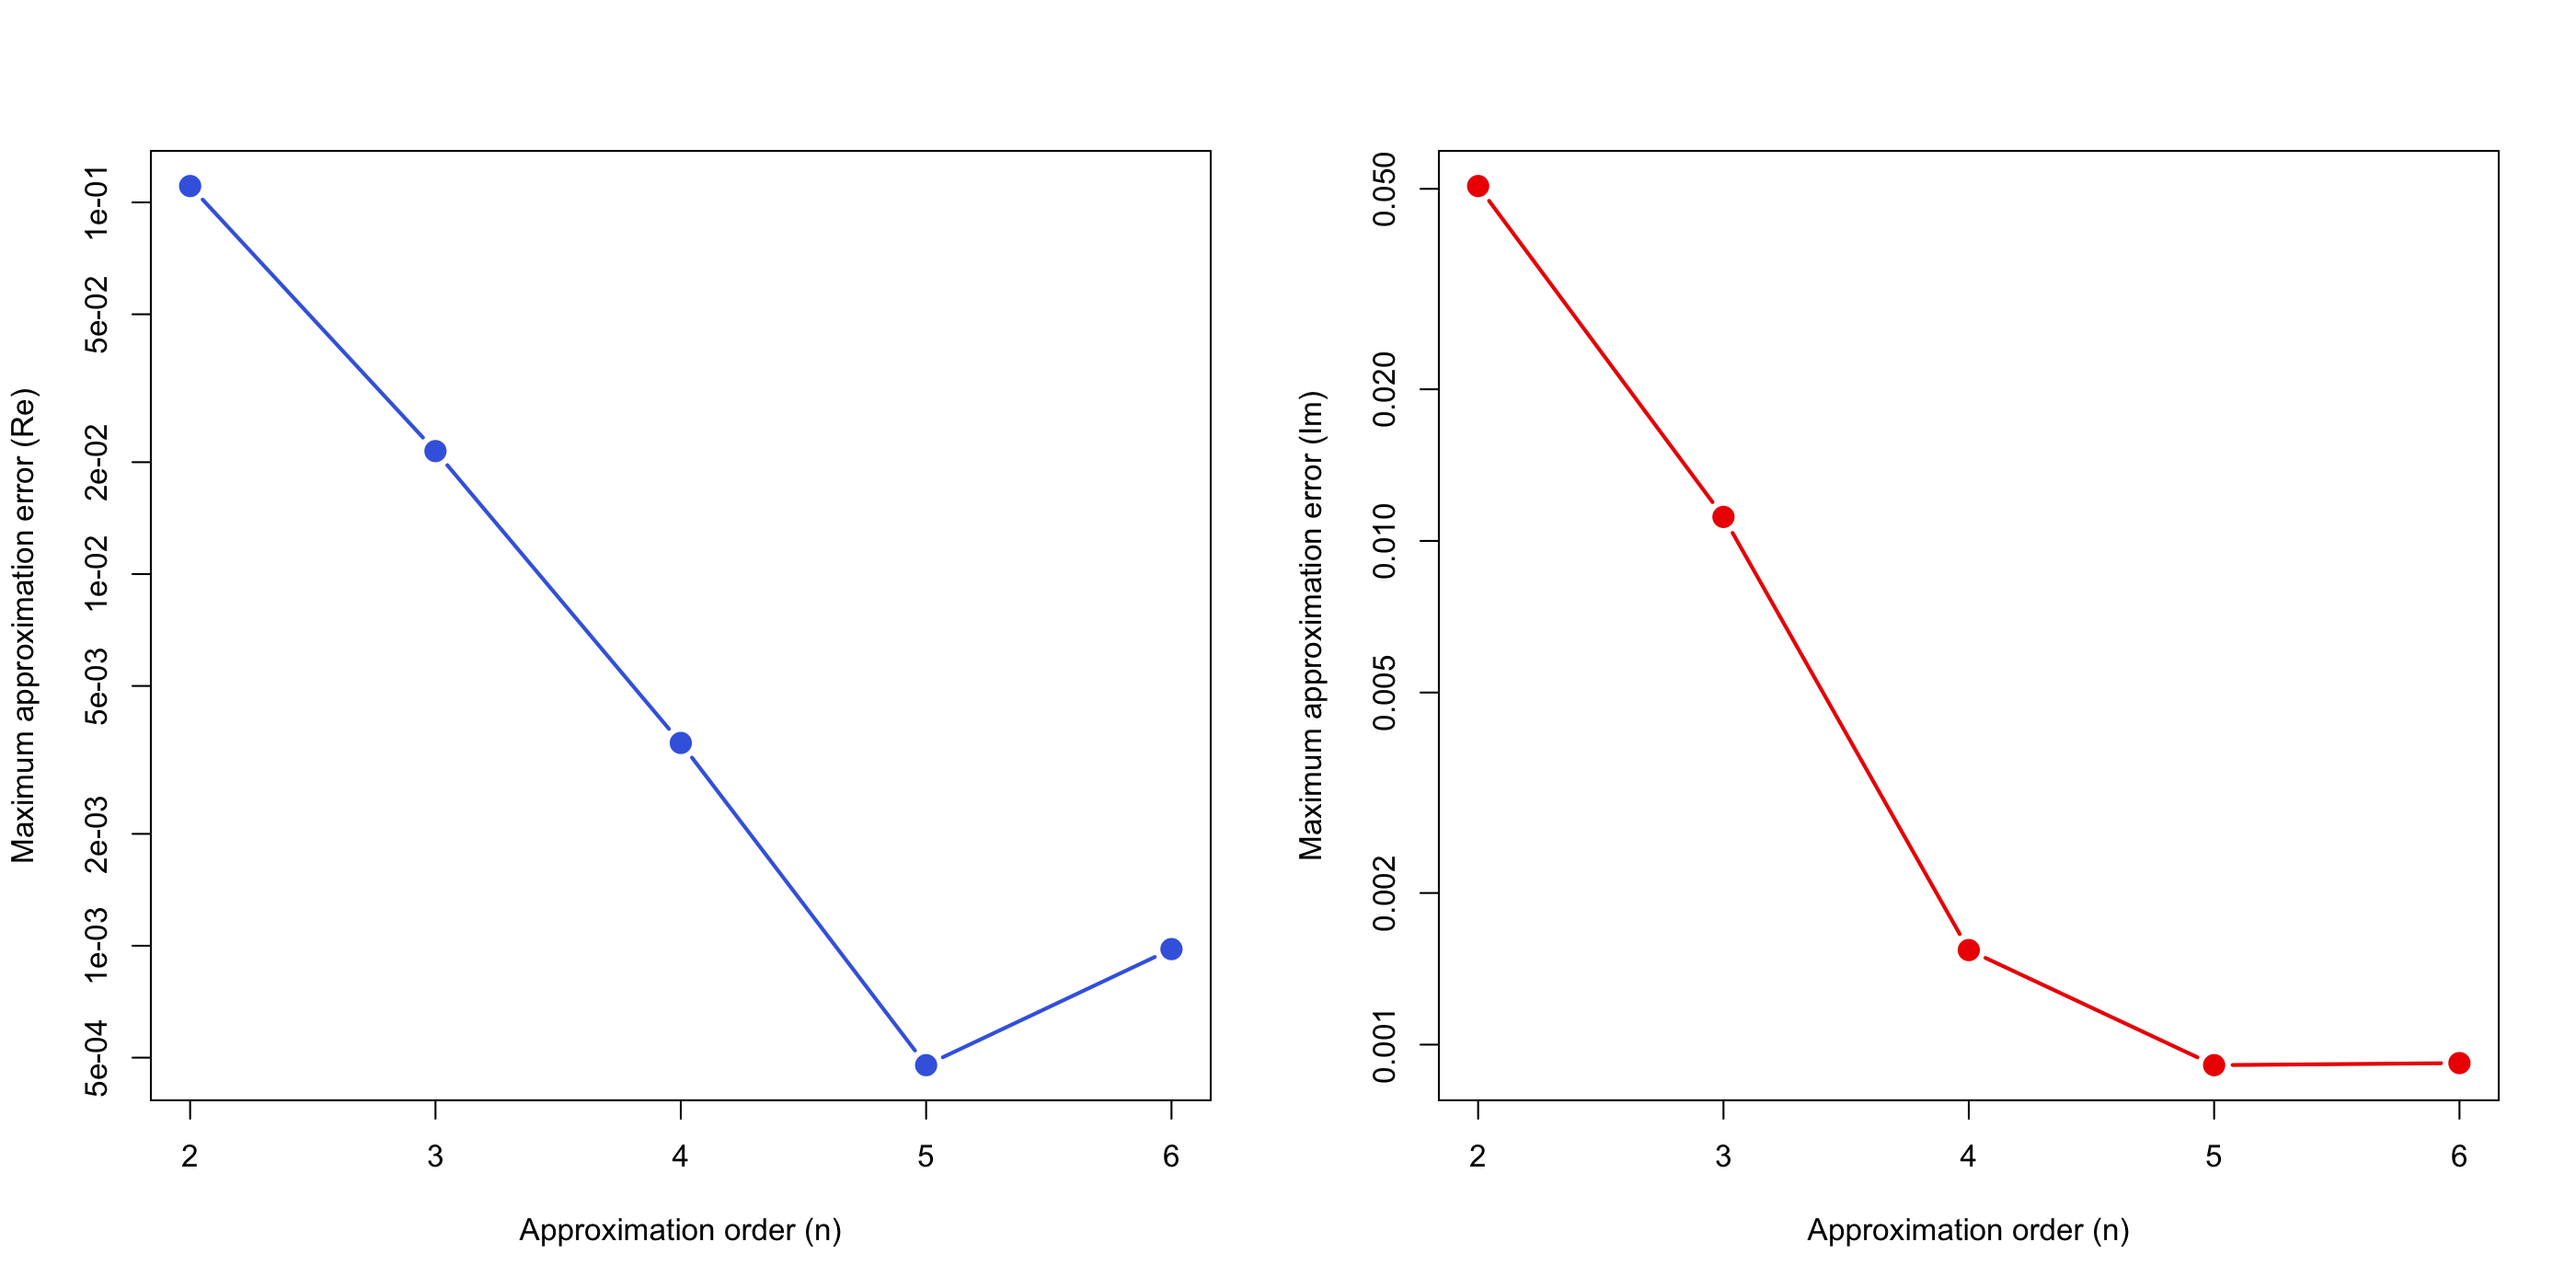

In [34]:
par(mfrow=c(1,2))

plot(2:6,abs(err.Re.res),pch=20,col="royalblue",type="b",lwd=2,cex=2,log="y",
     xaxt="n", 
    xlab="Approximation order (n)",ylab="Maximum approximation error (Re)")
axis(1, at = 2:6)

plot(2:6,abs(err.Im.res),pch=20,col="red2",type="b",lwd=2,cex=2,log="y",
     xaxt="n", 
    xlab="Approximation order (n)",ylab="Maximum approximation error (Im)")
axis(1, at = 2:6)
